In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
#from astropy.io.votable import parse
#from astropy.table import QTable, Table, Column
from functools import reduce
import matplotlib

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{siunitx}')

In [3]:
### DATA ####
q_0_theor = 1.6022e-19
g = 9.807
p = 102e5
T = ufloat(273.15 + 23, 0.2)
M_zr = 28.96 # kg/kmol
R = 8314 # J/K kmol 
rho_zr = p*M_zr / (R*T)
nu_zr = ufloat(18.3e-6, 0.01e-6)

rho = ufloat(973, 1)
d = unp.uarray([5e-3], [0.1e-3])
U = ufloat(154, 1)


v = unp.uarray([13.4, 13.6, 17.7, 42.0, 24.8, 30.4, 27.1, 24.6, 22.8, 8.75, 29.9, 41.3, 51.5, 56.3, 27.7, 34.2, 50.3], 17*[5]) * 1e-6 
v_p = unp.uarray([70.1, 67.8, 73.0, 68.7, 59.7, 72.0, 63.7, 67.5, 65.67, 70.5, 72.8, 99.6, 103.4, 106.1, ], 14 * [5]) * 1e-6 #hitrosti kapljic pri padanja navzdol 
v_m = unp.uarray([23.8, 26.4, 34.2, 29.2, 14.5, 56.8, 23.0, 4.6, 26.37, 0.7, 1.2, 37.4, 39.2, 18.0], 14 * [5]) * 1e-6 # hitrosti kapljiv pri premikanju navzgor (proti težnostnemu pospešku)

In [5]:
### PRVI DEL NALOGE ###

In [7]:
r1 = unp.sqrt(( 9 * nu_zr * v ) / (2 * (rho - rho_zr) * g))

E = U / d

q1 = (4 * np.pi * r1 ** 3 * (rho - rho_zr) * g) / (3 * E)

data1 = np.array([unp.nominal_values(v) * 1e6, unp.std_devs(v)/unp.nominal_values(v) , unp.nominal_values(r1) * 1e9, unp.std_devs(r1)/unp.nominal_values(r1) , unp.nominal_values(q1 / q_0_theor), unp.std_devs(q1 / q_0_theor)/ unp.nominal_values(q1 / q_0_theor)]).T

print(a2l.to_ltx(data1, frmt='{:6.1f}', arraytype='array'))

\begin{array}{ c, c, c, c, c, c}
    13.4 &     0.4 &   363.2 &     0.2 &     0.3 &     0.6\\
    13.6 &     0.4 &   365.9 &     0.2 &     0.3 &     0.6\\
    17.7 &     0.3 &   417.4 &     0.1 &     0.5 &     0.4\\
    42.0 &     0.1 &   643.0 &     0.1 &     1.9 &     0.2\\
    24.8 &     0.2 &   494.1 &     0.1 &     0.9 &     0.3\\
    30.4 &     0.2 &   547.0 &     0.1 &     1.2 &     0.2\\
    27.1 &     0.2 &   516.5 &     0.1 &     1.0 &     0.3\\
    24.6 &     0.2 &   492.1 &     0.1 &     0.8 &     0.3\\
    22.8 &     0.2 &   473.8 &     0.1 &     0.8 &     0.3\\
     8.8 &     0.6 &   293.5 &     0.3 &     0.2 &     0.9\\
    29.9 &     0.2 &   542.5 &     0.1 &     1.1 &     0.3\\
    41.3 &     0.1 &   637.6 &     0.1 &     1.8 &     0.2\\
    51.5 &     0.1 &   712.0 &     0.0 &     2.6 &     0.1\\
    56.3 &     0.1 &   744.5 &     0.0 &     2.9 &     0.1\\
    27.7 &     0.2 &   522.2 &     0.1 &     1.0 &     0.3\\
    34.2 &     0.1 &   580.2 &     0.1 &     1.4 &  

In [9]:
np.average(q1 / q_0_theor)

1.2476572687545986+/-0.0743224762490502

In [11]:
### DRUGI DEL NALOGE ###

In [13]:
U2 = 138
E2 = U2/d

r2 = unp.sqrt(9 * nu_zr * (v_p - v_m) / (4 * g * (rho - rho_zr)))

q2 = 3 * np.pi * r2 * nu_zr * (v_p + v_m) / E2

data2 = np.array([unp.nominal_values(v_p) * 1e6, unp.std_devs(v_p)/unp.nominal_values(v_p), unp.nominal_values(v_m) * 1e6, unp.std_devs(v_m)/unp.nominal_values(v_m), unp.nominal_values(r2) * 1e9, unp.std_devs(r2)/unp.nominal_values(r2), unp.nominal_values(q2 / q_0_theor), unp.std_devs(q2/q_0_theor)/unp.nominal_values(q2/q_0_theor)]).T

print(a2l.to_ltx(data2, frmt='{:6.1f}', arraytype='array'))

\begin{array}{ c, c, c, c, c, c, c, c}
    70.1 &     0.1 &    23.8 &     0.2 &   477.4 &     0.1 &     1.7 &     0.1\\
    67.8 &     0.1 &    26.4 &     0.2 &   451.4 &     0.1 &     1.7 &     0.1\\
    73.0 &     0.1 &    34.2 &     0.1 &   437.0 &     0.1 &     1.8 &     0.1\\
    68.7 &     0.1 &    29.2 &     0.2 &   440.9 &     0.1 &     1.7 &     0.1\\
    59.7 &     0.1 &    14.5 &     0.3 &   471.7 &     0.1 &     1.4 &     0.1\\
    72.0 &     0.1 &    56.8 &     0.1 &   273.5 &     0.2 &     1.4 &     0.2\\
    63.7 &     0.1 &    23.0 &     0.2 &   447.6 &     0.1 &     1.5 &     0.1\\
    67.5 &     0.1 &     4.6 &     1.1 &   556.4 &     0.1 &     1.6 &     0.1\\
    65.7 &     0.1 &    26.4 &     0.2 &   439.8 &     0.1 &     1.6 &     0.1\\
    70.5 &     0.1 &     0.7 &     7.1 &   586.1 &     0.1 &     1.6 &     0.1\\
    72.8 &     0.1 &     1.2 &     4.2 &   593.6 &     0.0 &     1.7 &     0.1\\
    99.6 &     0.1 &    37.4 &     0.1 &   553.3 &     0.1 &     3.0 &

In [15]:
np.average(q2 / q_0_theor)

1.923210151796489+/-0.06766760513026386

In [17]:
(np.average(q2 / q_0_theor) + np.average(q1/q_0_theor))/2

1.5854337102755438+/-0.054834352480536745

In [51]:
(np.average(q2) - np.average(q1))/q_0_theor

0.6755528830418902+/-0.09043365342544167

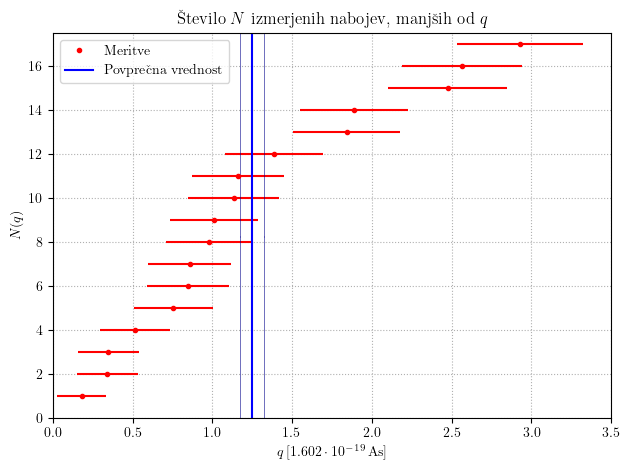

In [33]:
# plot 1

N = np.arange(len(q1))
q1.sort()

fig, ax = plt.subplots(1, 1)

ax.errorbar(unp.nominal_values(q1) / q_0_theor, N+1, xerr = unp.std_devs(q1) / q_0_theor, color='red', linestyle='', marker='.', label="Meritve")
ax.errorbar([1.2476572687545986, 1.2476572687545986], [-1,17.5], xerr =[0.0743224762490502, 0.0743224762490502] ,color='blue', linestyle='-', capsize=146.6, ecolor ="darkblue", capthick=0.4, label="Povprečna vrednost")

ax.set_title(f'Število $N$ izmerjenih nabojev, manjših od $q$')
ax.set_xlabel(r'$q\,[1.602 \cdot 10^{-19}\,\mathrm{As}]$')
ax.set_ylabel(r'$N(q)$')
ax.set_ylim(0, 17.5)
ax.set_xlim(0, 3.5)
ax.grid(which='both', linestyle=':', axis='both')

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels,numpoints=1)

fig.tight_layout()
fig.savefig(f'1metoda.pdf')

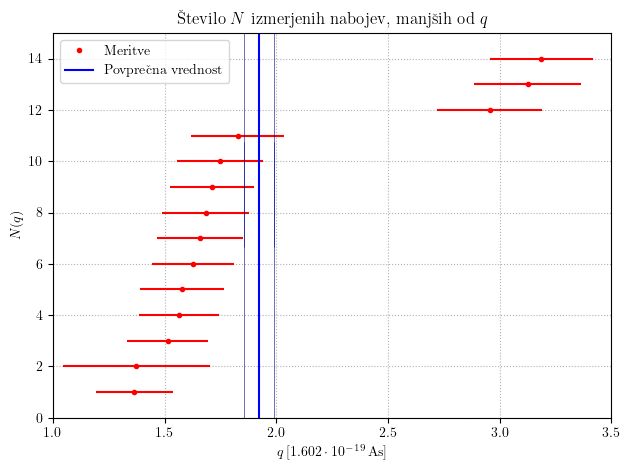

In [31]:
# plot 2

# plot 1

N = np.arange(len(q2))
q2.sort()

fig, ax = plt.subplots(1, 1)

ax.errorbar(unp.nominal_values(q2) / q_0_theor, N+1, xerr = unp.std_devs(q2) / q_0_theor, color='red', linestyle='', marker='.', label="Meritve")
ax.errorbar([1.923210151796489, 1.923210151796489], [-0.1,17.5], xerr =[0.06766760513026386, 0.06766760513026386] ,color='blue', linestyle='-', capsize=200, ecolor ="darkblue", capthick=0.4, label="Povprečna vrednost")

ax.set_title(f'Število $N$ izmerjenih nabojev, manjših od $q$')
ax.set_xlabel(r'$q\,[1.602 \cdot 10^{-19}\,\mathrm{As}]$')
ax.set_ylabel(r'$N(q)$')
ax.set_ylim(0, 15)
ax.set_xlim(1, 3.5)
ax.grid(which='both', linestyle=':', axis='both')

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels,numpoints=1)

fig.tight_layout()
fig.savefig(f'2metoda.pdf')

In [47]:
(q2[11]-q2[10])/q_0_theor

1.1293590102285573+/-0.3070570052890762